In [1]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
# Importing the dataset
bike = pd.read_csv('/content/gdrive/My Drive/day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254,0.227,0.653,0.350,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253,0.255,0.590,0.155,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253,0.242,0.753,0.124,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.256,0.232,0.483,0.351,364,1432,1796


In [4]:
bike.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
Data = bike[['cnt', 'temp']]
Data.describe()

,cnt,temp
count,731.000,731.000
mean,4504.349,0.495
std,1937.211,0.183
min,22.000,0.059
25%,3152.000,0.337
50%,4548.000,0.498
75%,5956.000,0.655
max,8714.000,0.862


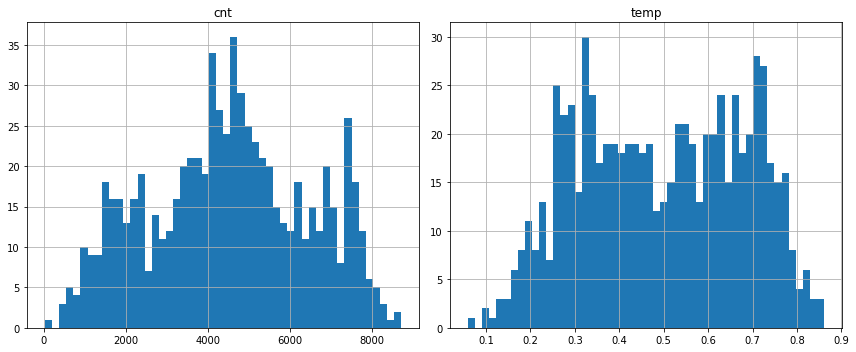

In [6]:
Data.hist(bins=50, figsize=(12, 5))
plt.tight_layout()

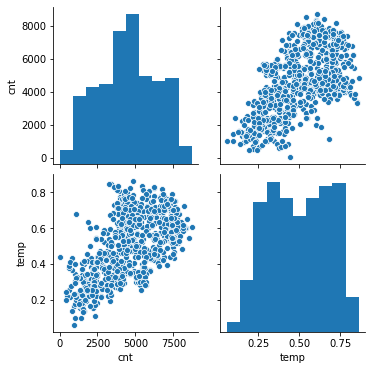

In [7]:
sns.pairplot(Data)

In [0]:
data = Data.sample(n=30).reset_index()

In [9]:
N= data.shape[0]
test = np.random.choice(np.arange(N),20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(10, 3) (20, 3)


In [0]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_poly.shape

(10, 3)

In [14]:
lin2 = LinearRegression(fit_intercept=False)
lin2.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [15]:
lin2.coef_

array([[ -7297.404,  46464.617, -39711.037]])

In [28]:
from sklearn.metrics import mean_squared_error
trainMSE = np.zeros(12)
testMSE = np.zeros(12)
for i in np.arange(1,13,1):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, y_train)
    trainMSE[i-1]= np.log(mean_squared_error(y_train, lin.predict(X_train_poly)))
    testMSE[i-1]= np.log(mean_squared_error(y_test, lin.predict(X_test_poly)))
    
print(trainMSE, '\n')
print(testMSE)

[ 14.64   14.177  13.751  13.749  12.577  12.511  12.256  11.436 -19.07
 -20.305 -20.113 -21.308] 

[15.124 14.784 15.549 15.628 17.74  18.393 20.976 21.55  30.734 31.48
 32.18  32.833]


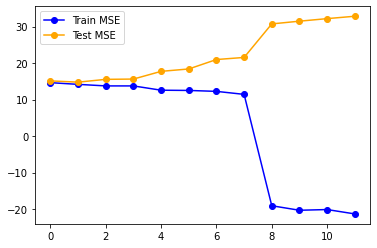

In [29]:
plt.plot(trainMSE, 'o-', color='blue', label = 'Train MSE')
plt.plot(testMSE, 'o-' ,color='orange', label = 'Test MSE')
plt.legend()